# Chord Recognition


## Setting up Environment
```bash
$ python -m venv chord
$ source chord/bin/activate # for linux
$ ./chord/Scripts/activate # for windows
$ python.exe -m pip install --upgrade pip # upgrade pip
$ pip install -r requirements.txt
```

In [123]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import scipy
import librosa
import soundfile as sf
import IPython.display as ipd
import csv

In [124]:
# Load all audio files in folder ./resources
audio, fs = sf.read('resources/karasu.mp3')
audio = audio[:,0]
# Shorten to 30s
audio = audio[int(1*fs):int(11*fs)]
print(audio.shape)
ipd.Audio(audio, rate=fs)

(441000,)


In [125]:
# Define constant

# 12 Major Chords and 12 Minor Chords Labels
chords_maj = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
chord_min = ['Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm', 'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm']

chord_labels = chords_maj + chord_min
print(chord_labels)

['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm', 'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm']


In [126]:
# Define function to extract chroma features
def extract_chroma(audio, fs):
    """
    Extract chroma features from audio signal

    Input:
        audio: np.array, audio signal
        fs: int, sampling rate

    Output:
        chroma: np.array, chroma features
    """
    N = 4096
    H = N // 2

    # Compute chroma features
    audio_fft = np.abs(librosa.stft(audio, n_fft=N, hop_length=H))
    chroma_filter = librosa.filters.chroma(sr = fs, n_fft = N)
    chroma = chroma_filter @ audio_fft

    return chroma

def log_comp(y, gamma):
    """
    Compute log compression

    Input:
        y: np.array, input signal
        gamma: float, compression factor
        
    Output:
        y_log: np.array, compressed signali
    """

    # Compute log compression
    y_log = np.sign(y) * np.log(1 + gamma * np.abs(y))

    return y_log

(12, 216)


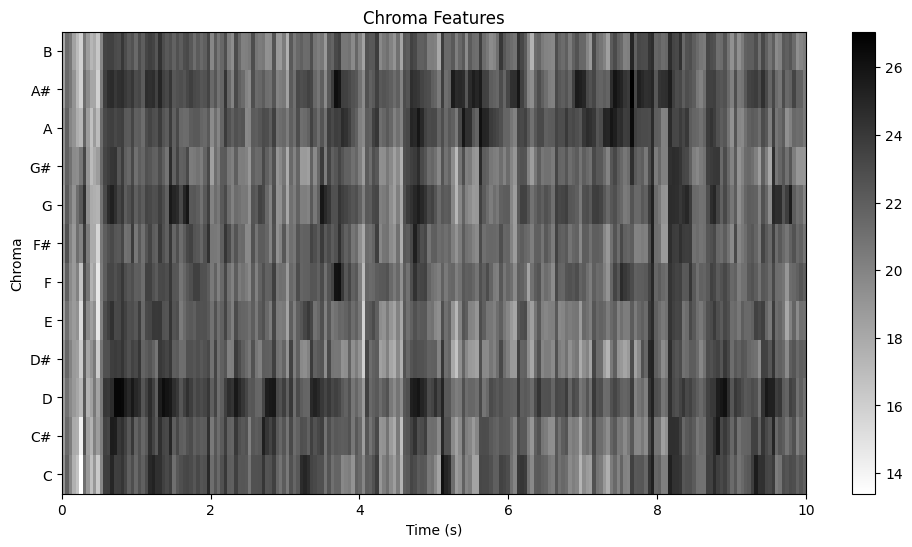

In [127]:
# Extract chroma features
chroma = extract_chroma(audio, fs)
print(chroma.shape)

chorma = log_comp(chroma, 100)

# Time axis
chroma_label = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Plot chroma features
plt.figure(figsize=(12, 6))
plt.imshow(10*np.log10(chroma + 1e-12), aspect='auto', origin='lower', cmap='grey_r', extent=[0, 10, 0, 12])
plt.yticks(np.arange(12) + 0.5, chroma_label)
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Chroma')
plt.title('Chroma Features')
plt.show()

## Hidden Markov Model
### Training the parameter based on the chorales dataset
The chorales dataset contains the chords, each corresponding with the measures. The idea is that we apply Baum-Welch algorithm on the dataset to train the parameters of the HMM model. For simplification, we have 24 states corresponding to 24 Maj Min chords (could be extended to sus4 and dim).

Bigram counting is used to record the transition of chords.

In [ ]:
# Load CSV file
def load_csv(filename):
    """
    Load CSV file

    Input:
        filename: str, filename

    Output:
        data: list, data
    """
    data = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def estimate_hmm_parameters(data, n_states, n_iter=100):
    pass